In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from torch.utils.data import Dataset, DataLoader

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Train",
                                           transform = trans)

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

validationset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/validation",
                                           transform = trans)

In [ ]:
val_loader = torch.utils.data.DataLoader(validationset, batch_size=4,
                                          shuffle=True)

In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Test",
                                           transform = trans)

In [ ]:
test_loader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                         shuffle = True)

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.

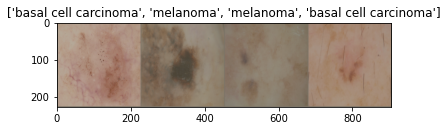

In [ ]:
inputs, classes = next(iter(train_loader))
class_names = trainset.classes
# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
import torchvision.models as models
net=models.googlenet(pretrained = True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [ ]:
num_classes = 4
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs,num_classes)
net.cuda()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [ ]:
for epoch in range(45):
  total = 0
  print("Training...")
  running_loss = 0.0
  correct = 0
  for i, data in enumerate(train_loader, 0):
      inputs, labels = data
      inputs, labels = inputs.cuda(), labels.cuda()
      imputs, lables = Variable(inputs.float().cuda()), Variable(labels.float().cuda())
      if i%100 == 0 :
          print("Training...",i)  
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
        
      loss.backward()
      optimizer.step()
        
      max_index = outputs.max(dim=1)[1]
      correct += (max_index == labels).sum().item()
      total += labels.size(0)
      running_loss += loss.item()
      # validation


      if (epoch > 9 and epoch % 10 == 0):
        class_correct = list(0. for i in range(1000))
        class_total = list(0. for i in range(1000))
        with torch.no_grad():
            for i,data in enumerate(val_loader,0):
                images, labels = data
                images = images.cuda()
                labels = labels.cuda()
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                c = (predicted == labels).squeeze()
                for i in range(labels.size()[0]):
                    label = labels[i].item()
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
        val_acc = sum(class_correct) / sum(class_total) * 100
      else:
        val_acc = 0




      
      if i % len(train_loader) == len(train_loader) - 1:
        print('[epoc: %d, %5d] training loss: %.3f' %
              (epoch + 1, i + 1, running_loss / len(train_loader)))
  print("Training Accuracy = {}".format(100 * correct / total))


            
print('finish') 

Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 1,   325] training loss: 1.239
Training Accuracy = 45.56669236700077
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 2,   325] training loss: 1.176
Training Accuracy = 50.26985350809561
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 3,   325] training loss: 1.093
Training Accuracy = 54.58750963762529
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 4,   325] training loss: 1.103
Training Accuracy = 53.19969159599075
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 5,   325] training loss: 1.031
Training Accuracy = 57.748650732459524
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 6,   325] training loss: 1.007
Training Accuracy = 58.596761757902854
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 7,   325] trainin

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/ml2021/Googlenet.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data
        images, labels = images.float().cuda(), labels.float().cuda()

        outputs = net(images)
        max_index = outputs.max(dim=1)[1]
        total += labels.size(0)
        correct += (max_index == labels).sum().item()

print('Accuracy of Test: %d %%' % (100 * correct / total))

Accuracy of Test: 60 %
